In [ ]:
#1

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

# Load the Palmer Penguins dataset using pandas
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# Create a figure with subplots for each species
species_list = df['species'].dropna().unique()
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Loop through each species
for i, species in enumerate(species_list):
    species_data = df[df['species'] == species].dropna(subset=['flipper_length_mm'])

    # Calculate metrics for flipper_length_mm
    flipper_lengths = species_data['flipper_length_mm']
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    q1 = np.percentile(flipper_lengths, 25)
    q3 = np.percentile(flipper_lengths, 75)
    std_dev = flipper_lengths.std()
    
    # Calculate standard deviation range
    lower_std_range = mean - 2 * std_dev
    upper_std_range = mean + 2 * std_dev
    
    # Add histogram trace for flipper_length_mm
    fig.add_trace(
        go.Histogram(x=flipper_lengths, nbinsx=20, name=f'{species} Flipper Lengths'),
        row=i+1, col=1
    )
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), row=i+1, col=1, annotation_text="Mean", annotation_position="top")
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), row=i+1, col=1, annotation_text="Median", annotation_position="top")
    
    # Add rectangles for ranges (min-max, IQR, and 2*std)
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor="LightSalmon", opacity=0.3, line_width=0, row=i+1, col=1, annotation_text="Range")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="LightGreen", opacity=0.3, line_width=0, row=i+1, col=1, annotation_text="IQR")
    fig.add_vrect(x0=lower_std_range, x1=upper_std_range, fillcolor="LightBlue", opacity=0.3, line_width=0, row=i+1, col=1, annotation_text="2*Std Dev")
    
# Update layout
fig.update_layout(height=1000, title_text="Flipper Length Distributions with Location and Scale Markers", showlegend=False)

# Show plot
fig.show()


In [ ]:
#2

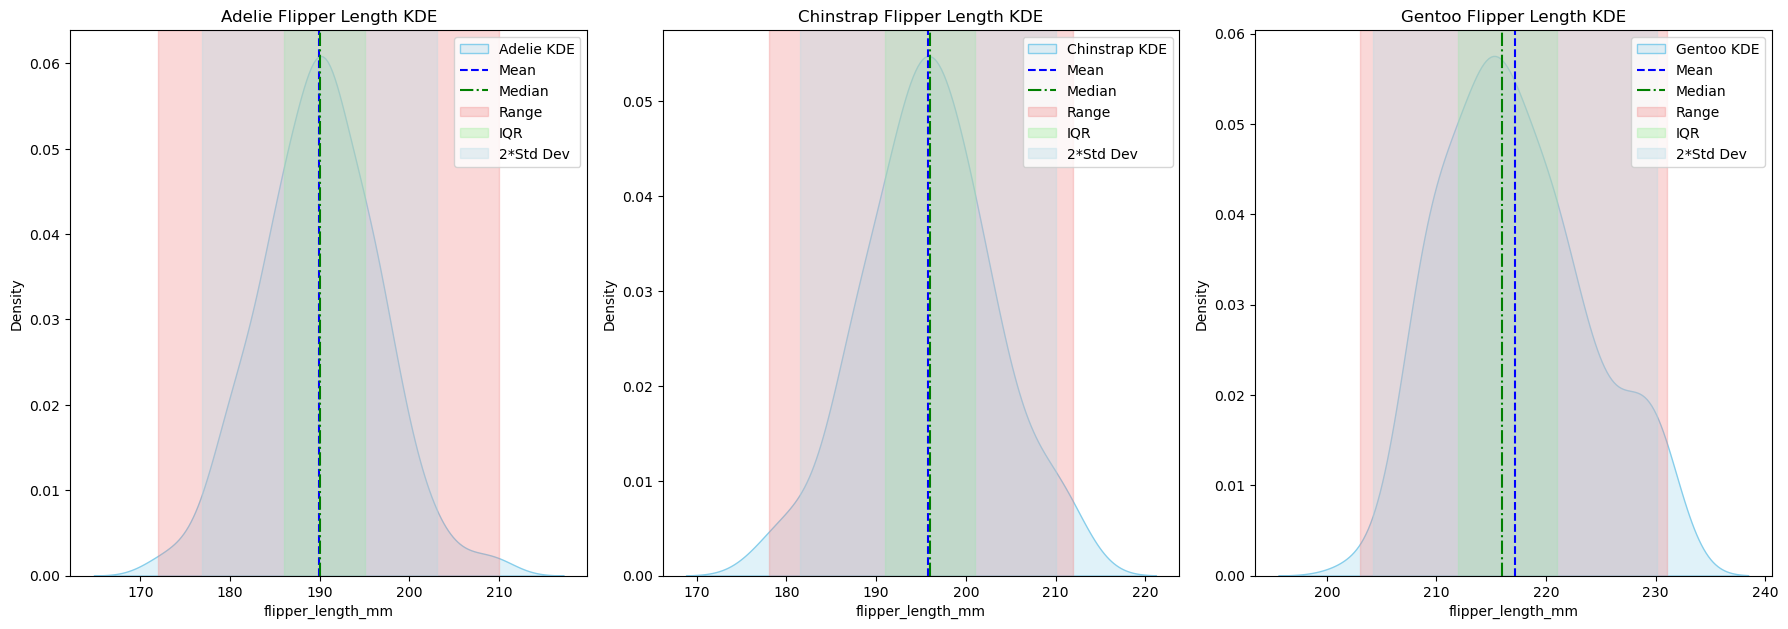

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Palmer Penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)

# List of species
species_list = df['species'].dropna().unique()

# Create a figure with subplots (3 plots per row)
fig, axes = plt.subplots(nrows=len(species_list) // 3 + 1, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each species to create KDE plots
for i, species in enumerate(species_list):
    ax = axes[i]
    species_data = df[df['species'] == species].dropna(subset=['flipper_length_mm'])
    
    # Calculate metrics for flipper_length_mm
    flipper_lengths = species_data['flipper_length_mm']
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    q1 = np.percentile(flipper_lengths, 25)
    q3 = np.percentile(flipper_lengths, 75)
    std_dev = flipper_lengths.std()
    
    lower_std_range = mean - 2 * std_dev
    upper_std_range = mean + 2 * std_dev
    
    # Plot the KDE for flipper_length_mm
    sns.kdeplot(flipper_lengths, ax=ax, fill=True, color='skyblue', label=f'{species} KDE')
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='-.', label='Median')
    
    # Add shaded areas for ranges (min-max, IQR, and 2*std)
    ax.axvspan(flipper_min, flipper_max, color='lightcoral', alpha=0.3, label='Range')
    ax.axvspan(q1, q3, color='lightgreen', alpha=0.3, label='IQR')
    ax.axvspan(lower_std_range, upper_std_range, color='lightblue', alpha=0.3, label='2*Std Dev')
    
    ax.set_title(f'{species} Flipper Length KDE')
    ax.legend()

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#3
'''
I perfer histogram more than others. 
Box plot is good for displaying key statistical values (min, max, quartiles, median, and outliers) but Does not show the detailed distribution or shape of the data.
KDE is good for smoothing the distribution and helping estimate the probability density function, but it is more complex and may be harder for general audiences.
'''

summary
link: https://chatgpt.com/share/66f61db1-7bf8-8012-b77a-db3cc21a0c6e

Initial Request:

You asked for guidance on marking location (mean and median) and scale (range, interquartile range, and standard deviation) of flipper_length_mm for each species in the Palmer Penguins dataset onto histograms. You provided a link to the dataset and requested the use of Plotly histograms with annotations for the statistics.
Solution for Plotly Histograms:

I helped generate code using Plotly, which included histograms for flipper_length_mm for each species. The code added vertical lines for the mean and median, as well as shaded regions to represent the range, interquartile range (IQR), and a region representing two standard deviations from the mean.
Adjustment to Plot:

There was a minor issue with a connection while generating the plot. I provided you with code you could run locally to achieve the desired output.
Switch to Seaborn KDE:

You then requested the same visualizations but using Seaborn’s Kernel Density Estimation (KDE) plots, organized in rows of three.
I provided a Python code using Seaborn to create KDE plots for flipper_length_mm, including vertical lines for the mean and median, and shaded areas for the range, IQR, and two standard deviations.
Pros and Cons of Visualizations:

After you described the basics of box plots, histograms, and kernel density estimators, I agreed with your descriptions and expanded them into a detailed pros and cons list. This list highlighted the strengths and weaknesses of each visualization:
Box plots: Good for summarizing key statistics and identifying outliers but lack detail on distribution shape.
Histograms: Simple and effective for showing distribution patterns but dependent on bin size.
KDE: Provides smooth and continuous distribution visualization but requires careful bandwidth selection and may be less intuitive for general audiences.
This summary captures the key points from our interaction. If you need more specific details or formatting, feel free to ask!

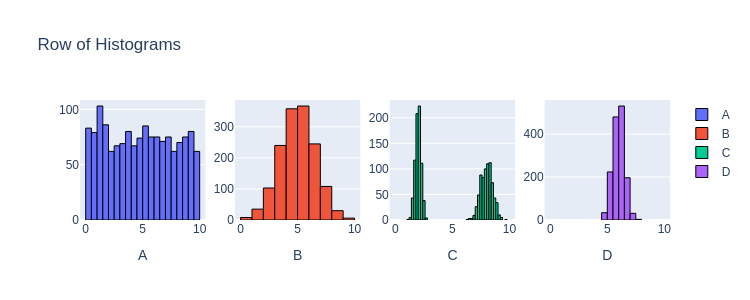

In [21]:
#4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Which datasets have similar means and similar variances:
B and D
Which datasets have similar means but quite different variances:
B and C
Which datasets have similar variances but quite different means:
A and C
Which datasets have quite different means and quite different variances:
C and D

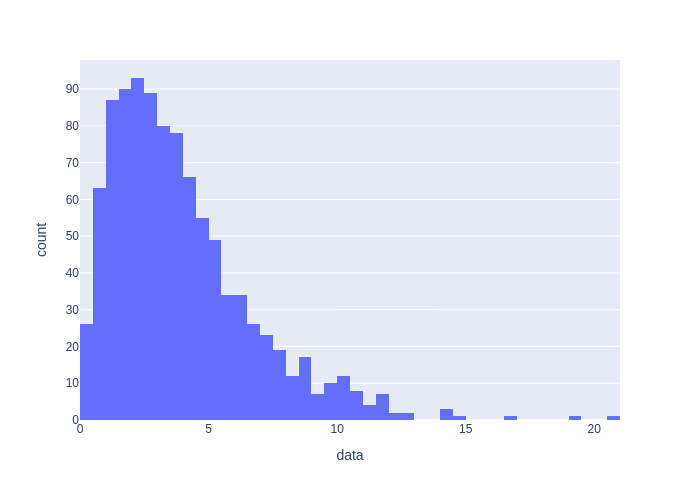

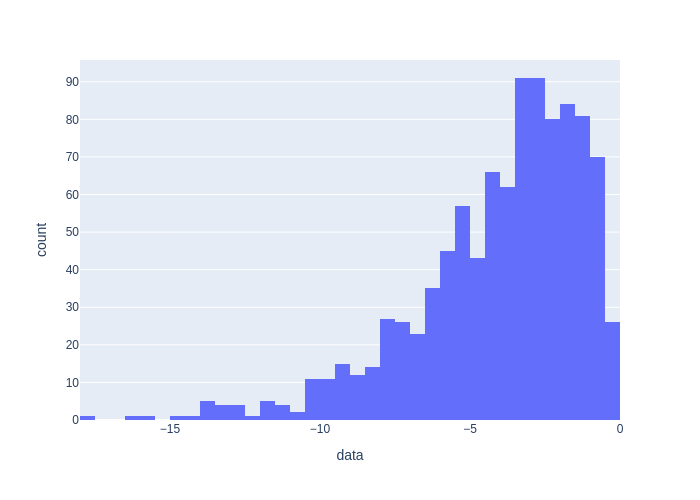

In [30]:
#5
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
fig1.show(renderer="png")

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

Mean is the average of all the datas and median is the data that is at the middle of the data points.
Left skewed means the data points are more on the right and less on the left and right skewed is opposite.
For left skewed mean is amaller than Median and for right skewed, mean is larger than median

In [ ]:
#sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
'''
This generates 1000 random variables from the gamma distribution, a continuous probability distribution.
'''

In [ ]:
#fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
'''
create a histogram of sample1
'''

In [ ]:
#fig1.show(renderer="png")
'''
display histogram in png
'''

In [ ]:
#sample1.mean()
'''
calculates the mean of sample1
'''
#np.quantile(sample1, [0.5])
'''
This computes the median of sample1. The 0.5 quantile is equivalent to the median.
'''

In [ ]:
#sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
'''
create another sample
'''

In [31]:
#6
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
nutrition_data = pd.read_csv(url)

# Visualize the distribution of calories
fig_calories = px.histogram(nutrition_data, x="calories", title="Distribution of Calories", nbins=50)
fig_calories.show()

# Visualize the distribution of total fat
fig_fat = px.histogram(nutrition_data, x="total fat (g)", title="Distribution of Total Fat (g)", nbins=50)
fig_fat.show()

# Visualize the distribution of sugars
fig_sugars = px.histogram(nutrition_data, x="sugars (g)", title="Distribution of Sugars (g)", nbins=50)
fig_sugars.show()


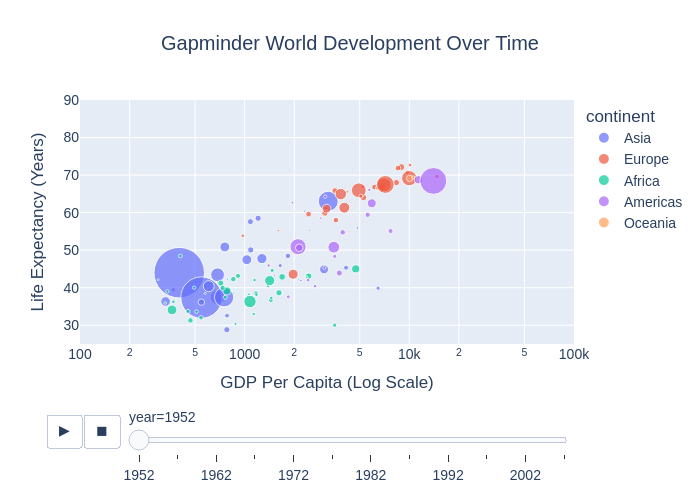

In [36]:
#7
import plotly.express as px

# Load the built-in gapminder dataset from Plotly
gapminder_data = px.data.gapminder()

# Create the animated scatter plot
fig = px.scatter(
    gapminder_data,
    x="gdpPercap",  # GDP per capita
    y="lifeExp",  # Life expectancy
    animation_frame="year",  # Time component for animation
    animation_group="country",  # Animate each country
    size="pop",  # Bubble size based on population
    color="continent",  # Color by continent
    hover_name="country",  # Show country name on hover
    log_x=True,  # Log scale for GDP per capita
    size_max=55,  # Max size for bubble
    range_x=[100, 100000],  # X-axis range for GDP per capita
    range_y=[25, 90],  # Y-axis range for life expectancy
    title="Gapminder World Development Over Time",
    labels={"gdpPercap": "GDP Per Capita", "lifeExp": "Life Expectancy"}
)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title="GDP Per Capita (Log Scale)",
    yaxis_title="Life Expectancy (Years)",
    title_font_size=20,
    title_x=0.5,
    font=dict(size=14),
)

# Show the animated plot
fig.show(renderer="png")
#!!!! fig.show() make the animation working!!! I'm using fig.show(renderer="png") for the submission!!


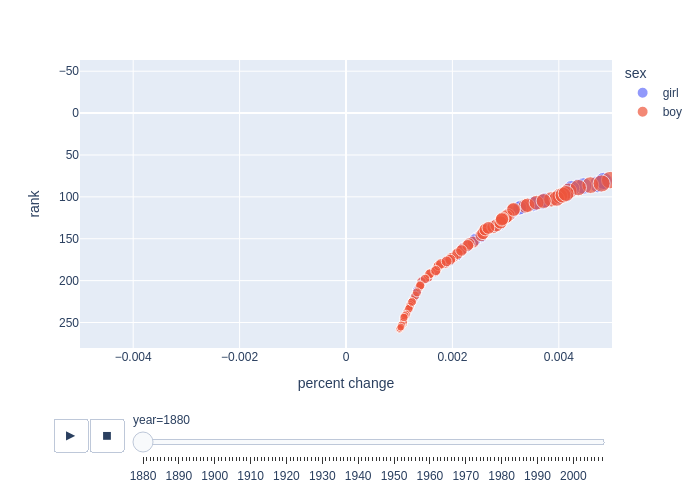

In [37]:
#8
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank the names by percentage within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort the DataFrame by year
bn = bn.sort_values('year')

# Restrict to "common" names
bn = bn[bn.percent > 0.001]

# Create the scatter plot with specified parameters
fig = px.scatter(
    bn,
    x="percent change",  # X-axis: Percent change
    y="rank",            # Y-axis: Rank
    animation_frame="year",  # Animation by year
    animation_group="name",   # Group by name for animation
    size="percent",      # Size by percentage
    color="sex",        # Color by sex
    hover_name="name",  # Hover name as name
    size_max=50,        # Max size for bubbles
    range_x=[-0.005, 0.005]  # X-axis range
)

# Update Y-axis to reverse order (rank 1 at the top)
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#!!!! fig.show() make the animation working!!! I'm using fig.show(renderer="png") for the submission!!


Summary of Interactions
Link: https://chatgpt.com/share/66f62b48-d420-8012-8dbe-f79f33ea0018


Understanding Skewness:

You asked about the relationship between the mean and median in relation to right and left skewness. I provided an explanation and proposed a code extension using scipy and numpy to generate right-skewed and left-skewed data and visualize the mean and median for both distributions.
Exploring Nutritional Dataset:

You provided a link to a dataset containing fast-food nutritional information. I assisted you in loading the dataset, calculating summary statistics, and visualizing distributions of key nutritional variables such as calories, total fat, and sugars using histograms.
Recreating the Gapminder Animation:

You requested guidance on recreating the classic Gapminder animation using Plotly. I provided a code example using the built-in Gapminder dataset from Plotly Express to create an animated scatter plot displaying GDP per capita versus life expectancy over time.
Creating a Second Version of the Figure:

You provided specific requirements for modifying the Gapminder figure to focus on baby names. I helped you by providing code to generate an animated scatter plot based on the Baby Names dataset, with changes to the axes, size, color, and other parameters as per your specifications.
